# Day 7: Bringing It All Together - Mini Project

Congratulations on making it to Day 7! You've spent the week learning the fundamentals of NumPy, Pandas, and Matplotlib. Now it's time to put all those skills to the test with a mini-project.

Today, you will be an analyst exploring the famous Titanic dataset. Your goal is to load the data, perform some basic cleaning, and create visualizations to answer a few key questions about the passengers and their survival.

**Your tasks today:**
1.  **Load a new dataset** from a URL.
2.  **Inspect the data** using your Pandas skills (`.head()`, `.info()`, `.describe()`).
3.  **Perform a simple data cleaning** task (handling missing values).
4.  **Create visualizations** (bar charts, histograms) to answer specific questions.

Let's begin by importing our libraries and loading the dataset. The Titanic dataset is available online, so we can load it directly into pandas.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# URL for the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

# Load the dataset into a pandas DataFrame
titanic_df = pd.read_csv(url)

---

## Step 1: Inspect the Data

Before we can analyze the data, we need to understand it. What columns are there? What are their data types? Are there missing values?

**Exercise 1.1:** Use the `.head()` method to display the first 5 rows of the `titanic_df` DataFrame.

In [5]:
# Your code here
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Solution 1.1:**

In [ ]:
# Solution
titanic_df.head()

**Exercise 1.2:** Use the `.info()` method to get a summary of the DataFrame, including the data types of each column and the number of non-null values.

In [6]:
# Your code here
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Solution 1.2:**

In [ ]:
# Solution
titanic_df.info()

---

## Step 2: Data Cleaning

From the output of `.info()`, you probably noticed that the 'Age' column has a lot of missing values (891 entries total, but only 714 non-null values for Age). For our analysis, let's fill these missing ages with the median age of all passengers. The median is often a better choice than the mean when the data might have outliers.

**Exercise 2.1:** 
1. Calculate the median of the 'Age' column.
2. Use the `.fillna()` method to replace the missing values (`NaN`) in the 'Age' column with the median age. Make sure to update the DataFrame.
3. Verify your work by running `.info()` again to see that the 'Age' column now has 891 non-null values.

In [ ]:
# Your code here
median_age = titanic_df["Age"].median()
print(f"The median age is: {median_age}")

titanic_df.fillna({"Age": median_age}, inplace=True)
titanic_df.info()

The median age is: 28.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Solution 2.1:**

In [ ]:
# Solution
# 1. Calculate the median age
median_age = titanic_df["Age"].median()
print(f"The median age is: {median_age}")

# 2. Fill missing values
titanic_df["Age"].fillna(median_age, inplace=True)

# 3. Verify the result
print("\nDataFrame info after filling missing ages:")
titanic_df.info()

---

## Step 3: Answering Questions with Visualizations

Now that our data is clean, we can start exploring it visually!

**Question 1: How many people survived versus how many did not?**

**Exercise 3.1:** Create a bar chart showing the count of passengers in the 'Survived' column. (0 = No, 1 = Yes).

*Hint: Use the `.value_counts()` method on the 'Survived' column to get the data for your bar chart.*

Text(0, 0.5, 'Number of Passengers')

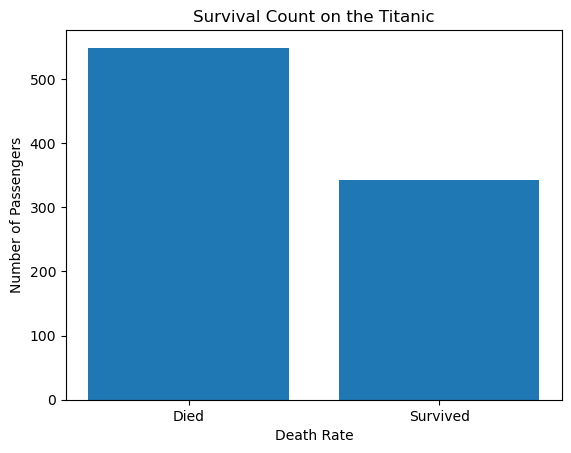

In [16]:
# Your code here
counts = titanic_df["Survived"].value_counts()
plt.bar(["Died", "Survived"], counts.values)

plt.title("Survival Count on the Titanic")
plt.xlabel("Death Rate")
plt.ylabel('Number of Passengers')

**Solution 3.1:**

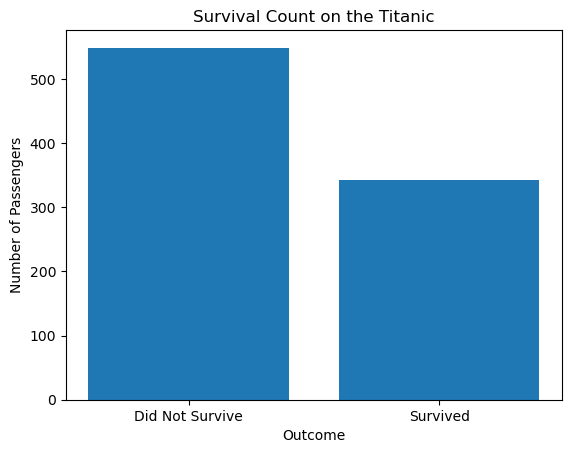

In [17]:
# Solution
survival_counts = titanic_df["Survived"].value_counts()

plt.bar(
    x=survival_counts.index,
    height=survival_counts.values,
    tick_label=["Did Not Survive", "Survived"],
)

plt.title("Survival Count on the Titanic")
plt.xlabel("Outcome")
plt.ylabel("Number of Passengers")

plt.show()

**Question 2: What was the age distribution of passengers on the Titanic?**

**Exercise 3.2:** Create a histogram of the 'Age' column to see the distribution of passenger ages. Customize it with 25 bins and an edge color of 'black' for clarity.

Text(0, 0.5, 'Frequency')

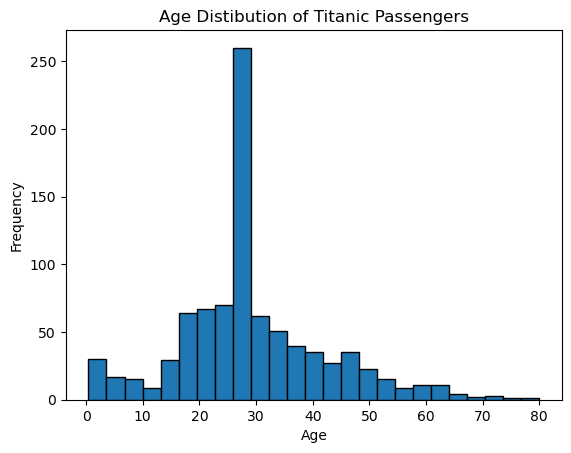

In [20]:
# Your code here
plt.hist(titanic_df["Age"], bins=25, edgecolor='black')

plt.title('Age Distibution of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')

**Solution 3.2:**

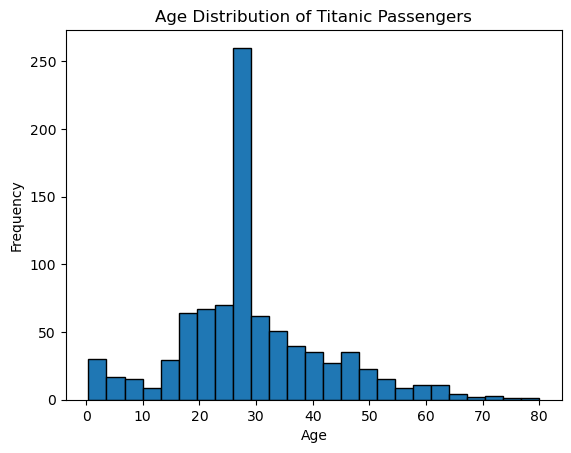

In [21]:
# Solution
plt.hist(titanic_df["Age"], bins=25, edgecolor="black")

plt.title("Age Distribution of Titanic Passengers")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.show()

**Question 3: Did passenger class influence survival rate?**

**Exercise 3.3:** Create a bar chart that shows the survival rate by passenger class ('Pclass').

*Hint: This is a bit more challenging! You'll need to use `.groupby('Pclass')['Survived'].mean()` to calculate the survival rate for each class.*

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


Text(0, 0.5, 'Survival Rate')

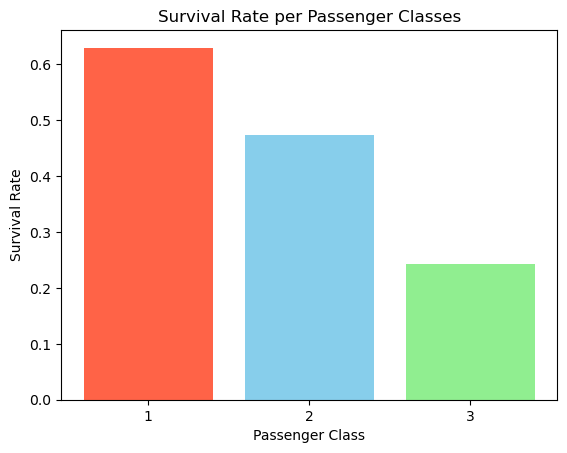

In [28]:
# Your code here
survival_by_class = titanic_df.groupby('Pclass')['Survived'].mean()
print(survival_by_class)

plt.bar(x=survival_by_class.index, height=survival_by_class.values, color=['tomato', 'skyblue', 'lightgreen'])
plt.xticks([1, 2, 3])
plt.title('Survival Rate per Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

**Solution 3.3:**

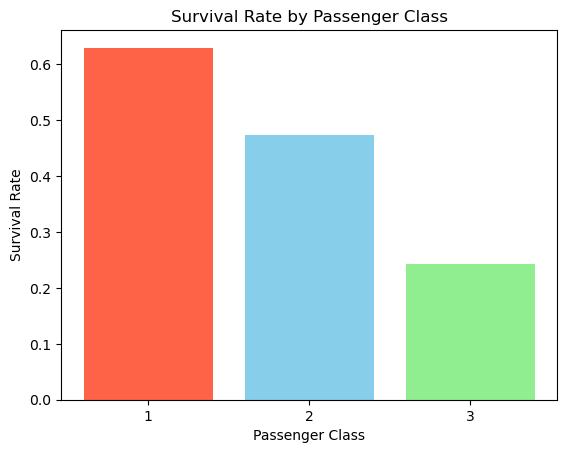

In [26]:
# Solution
survival_by_class = titanic_df.groupby("Pclass")["Survived"].mean()

plt.bar(
    x=survival_by_class.index,
    height=survival_by_class.values,
    color=["tomato", "skyblue", "lightgreen"],
)

plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.xticks([1, 2, 3])  # Ensure ticks are on the class numbers

plt.show()

---

### Congratulations on completing Week 1!

You have successfully loaded, inspected, cleaned, and analyzed a real dataset. You used Pandas to manipulate the data and Matplotlib to uncover insights visually. These are the core skills of any data analyst or data scientist.

Next week, we will dive deeper with more advanced topics in Pandas and an introduction to the powerful SciPy library for scientific computing!